# Jaime Yussef Leon Contreras
## Proyecto final

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import graphviz
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Citi Bike Dataset

Trabajaremos con el dataset de citibike para predecir las rentas frente a la casa de Andreas.

En Nueva York, Citi Bike opera una red de estaciones de alquiler de bicicletas con un sistema de suscripción. Las estaciones están repartidas por toda la ciudad y ofrecen una forma cómoda de desplazarse. Los datos de alquiler de bicicletas se hacen públicos de forma anónima y se han analizado de diversas formas. La tarea que queremos resolver es predecir durante un día y una hora determinados cuántas personas alquilarán una bicicleta frente a la casa de Andreas, para que sepa si le quedará alguna bicicleta.

Primero cargamos los datos de agosto de 2015 para esta estación en particular como pandas DF, reasignamos los datos en intervalos de tres horas para obtener las principales tendencias de cada día:

In [37]:
def load_citibike():
    data_mine = pd.read_csv(os.path.join(DATA_PATH, "citibike.csv"))
    data_mine['one'] = 1
    data_mine['starttime'] = pd.to_datetime(data_mine.starttime)
    data_starttime = data_mine.set_index("starttime")
    data_resampled = data_starttime.resample("3h").sum().fillna(0)
    return data_resampled.one

In [38]:
citibike = pd.read_csv('citibike.csv')
citibike['one'] = 1
citibike['starttime'] = pd.to_datetime(citibike.starttime)
citibike = citibike.set_index('starttime')
citibike = citibike.resample('3h').sum().fillna(0)

In [39]:
citibike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2015-08-01 00:00:00 to 2015-08-31 21:00:00
Freq: 3H
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             248 non-null    int64  
 1   start station id         248 non-null    int64  
 2   start station latitude   248 non-null    float64
 3   start station longitude  248 non-null    float64
 4   end station id           248 non-null    int64  
 5   end station latitude     248 non-null    float64
 6   end station longitude    248 non-null    float64
 7   bikeid                   248 non-null    int64  
 8   birth year               248 non-null    float64
 9   gender                   248 non-null    int64  
 10  one                      248 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 23.2 KB


In [5]:
citibike.head()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,one
starttime,,,,,,,,,,,
2015-08-01 00:00:00,4534,903,122.166523,-221.951063,2660,122.162331,-221.969334,58722,5953.0,3,3
2015-08-01 03:00:00,0,0,0.000000,0.000000,0,0.000000,0.000000,0,0.0,0,0
2015-08-01 06:00:00,4868,2709,366.499570,-665.853190,3456,366.578445,-665.923247,179012,17841.0,11,9
2015-08-01 09:00:00,34595,12341,1669.609152,-3033.331199,15167,1670.028362,-3033.620739,742311,57422.0,35,41
2015-08-01 12:00:00,26850,11739,1588.164803,-2885.363824,14286,1588.322750,-2885.528995,723894,65367.0,42,39


Text(0.5, 1.0, 'Correlacion entre edad y duracion de viaje')

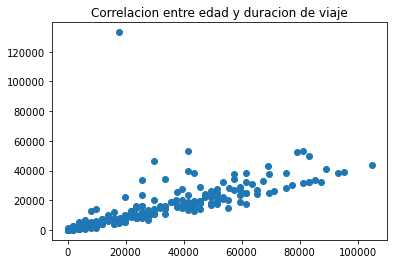

In [91]:
plt.scatter( citibike[['birth year']], citibike[['tripduration']])
plt.title('Correlacion entre edad y duracion de viaje')

In [90]:
citibike.corr()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,one
tripduration,1.000000,0.769101,0.769101,-0.769101,0.728224,0.769099,-0.769101,0.762761,0.737173,0.732191,0.769101
start station id,0.769101,1.000000,1.000000,-1.000000,0.949341,1.000000,-1.000000,0.997043,0.982241,0.977890,1.000000
start station latitude,0.769101,1.000000,1.000000,-1.000000,0.949341,1.000000,-1.000000,0.997043,0.982241,0.977890,1.000000
start station longitude,-0.769101,-1.000000,-1.000000,1.000000,-0.949341,-1.000000,1.000000,-0.997043,-0.982241,-0.977890,-1.000000
end station id,0.728224,0.949341,0.949341,-0.949341,1.000000,0.949337,-0.949333,0.950869,0.922695,0.914677,0.949341
end station latitude,0.769099,1.000000,1.000000,-1.000000,0.949337,1.000000,-1.000000,0.997041,0.982248,0.977897,1.000000
end station longitude,-0.769101,-1.000000,-1.000000,1.000000,-0.949333,-1.000000,1.000000,-0.997042,-0.982243,-0.977892,-1.000000
bikeid,0.762761,0.997043,0.997043,-0.997043,0.950869,0.997041,-0.997042,1.000000,0.978267,0.973546,0.997043
birth year,0.737173,0.982241,0.982241,-0.982241,0.922695,0.982248,-0.982243,0.978267,1.000000,0.993865,0.982241
gender,0.732191,0.977890,0.977890,-0.977890,0.914677,0.977897,-0.977892,0.973546,0.993865,1.000000,0.977890


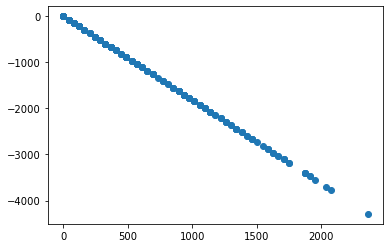

In [71]:
plt.scatter(citibike[['start station latitude']], citibike[['start station longitude']])

In [40]:
citibikeone = citibike.one

In [41]:
print('Citi Bike data:\n{}'.format(citibikeone.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


El siguiente ejemplo muestra una visualización de las frecuencias de alquiler para todo el mes.

Text(0.5, 1.0, 'Grafica durante el mes de Agosto')

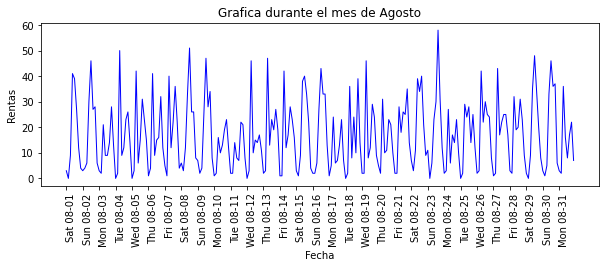

In [92]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                      freq='D')
plt.xticks(xticks, xticks.strftime('%a %m-%d'), rotation=90, ha='left')
plt.plot(citibikeone, linewidth=1, c='b')
plt.xlabel('Fecha')
plt.ylabel('Rentas')
plt.title('Grafica durante el mes de Agosto')

Al observar los datos, podemos distinguir claramente el día y la noche para cada intervalo de 24 horas. Los patrones para los días de semana y los fines de semana también parecen ser bastante diferentes. Al evaluar una tarea de predicción en una serie de tiempo como esta, normalmente queremos aprender del pasado y predecir el futuro. Esto significa que cuando hacemos una división en un entrenamiento y un conjunto de prueba, queremos usar todos los datos hasta una fecha determinada como el conjunto de entrenamiento y todos los datos después de esa fecha como el conjunto de prueba. 

Así es como usualmente usaríamos la predicción de series de tiempo: dado todo lo que sabemos sobre alquileres en el pasado, ¿qué sucederá mañana? Usaremos los primeros 184 puntos de datos correspondientes a los primeros 23 días, como nuestro conjunto de entrenamiento, y los 64 puntos de datos restantes, correspondientes a los 8 días restantes, como nuestro conjunto de prueba.

La única característica que usamos en nuestra tarea previa es la fecha y la hora en que se produjo un número particular de alquileres. Entonces, la función de entrada es la fecha y la hora, digamos,
2015-08-01 00: 00: 00- y la salida es el número de alquileres en las siguientes tres horas (tres en este caso, según nuestro DF).


In [46]:
# Extraer los valores que queremos predecir (numero de rentas)
y = citibikeone.values
# Coviertir tiempo POSIX al dividir por 10**9
X = citibikeone.index.astype('int64').values.reshape(-1, 1)//10**9

/Users/leon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


In [47]:
# Definimos una funcion para dividir los datos en train y test,
# crear el modelo y visualizar el resultado:


# Usamos los primeros 184 puntos para entrenar y el resto para el testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # Dividir entre train y test
    X_train, X_test = features[:n_train], features[n_train:]
    # Dividimos el valor a predecir
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print('Test-set R^2: {:.2f}'.format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,4))
    
    plt.xticks(range(0, len(X), 8), xticks.strftime('%a %m-%d'),
               rotation=90,ha='left')
    
    plt.plot(range(n_train), y_train, 'b-', label='train')
    plt.plot(range(n_train, len(y_test) + n_train),
            y_test, 'r-', label='test')
    plt.plot(range(n_train), y_pred_train, 'g--', label='prediction train')
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, 'k--',
            label='prediction test')
    plt.legend(loc=(1.01, 0))
    plt.xlabel('Date')
    plt.ylabel('Rentals')

Usamos la función de tiempo POSIX X y pasamos un regresor de bosque aleatorio a nuestra función eval_on_features

Test-set R^2: -0.04


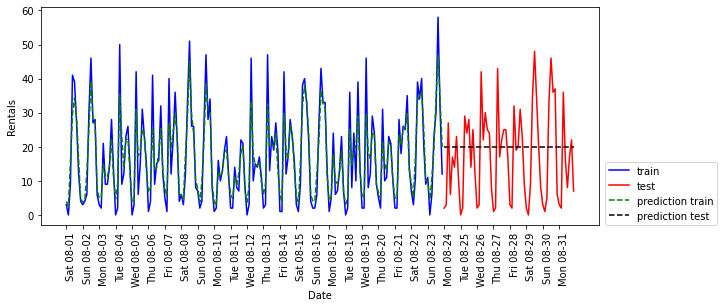

In [48]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

Las predicciones del conjunto de entrenamiento son bastante buenas, como es habitual en los bosques aleatorios. Sin embargo, para la prueba, se predice una línea constante. El R ^ 2 es -0.04, lo que significa que no aprendimos nada.

El problema radica en la combinación de nuestra característica y el bosque aleatorio. El valor de la característica de tiempo POSIX para el conjunto de prueba está fuera del rango de los valores de la característica en el conjunto de entrenamiento: los puntos en el conjunto de prueba tienen marcas de tiempo posteriores a todos los puntos del conjunto de entrenamiento. 

Los árboles, y por lo tanto los bosques aleatorios, no se pueden extrapolar a rangos de características fuera del conjunto de entrenamiento. El resultado es que el modelo simplemente predice el valor objetivo del punto más cercano en el conjunto de entrenamiento, que es la última vez que observó datos.

Claramente podemos hacerlo mejor que esto. Al observar las cifras de alquiler en los datos de capacitación, dos factores parecen ser muy importantes; la hora del día y el día de la semana. Así que agreguemos estas dos características. Realmente no podemos aprender nada de la época POSIX, por lo que eliminamos esa característica. Primero, usemos solo la hora del día. ahora las predicciones tienen el mismo patrón para cada día de la semana.

Test-set R^2: 0.60


Text(0.5, 1.0, 'Prediccion utilizando random forest utilizando la hora del dia como feature')

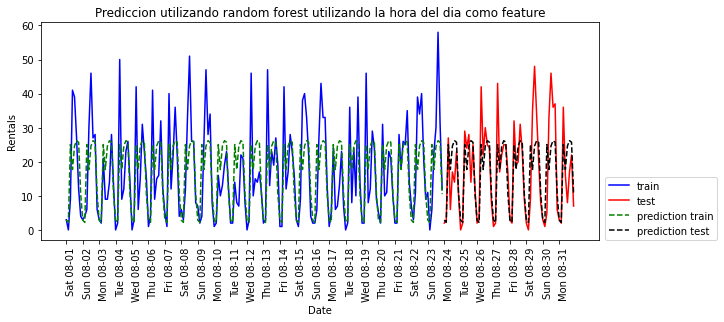

In [50]:
X_hour = citibikeone.index.hour.values.reshape(-1, 1)

eval_on_features(X_hour, y, regressor)

plt.title('Prediccion utilizando random forest utilizando la hora del dia como feature')

Podemos observar que el R^2 es mucho me
jor, pero en los fines de semana, el modelo no llega a predecir tan bien, asi que agregaremos ttambien el dia de la semana como feature.

(array([31., 31., 31., 31., 31., 31., 62.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21.]),
 <BarContainer object of 7 artists>)

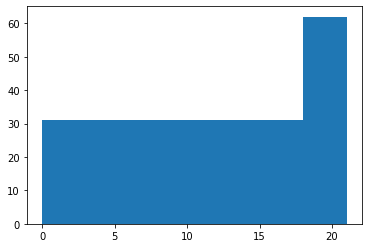

In [85]:
plt.hist(X_hour, bins=7)

Test-set R^2: 0.84


Text(0.5, 1.0, 'Prediccion con modelo random forest utilizando dia de la semana y hora ')

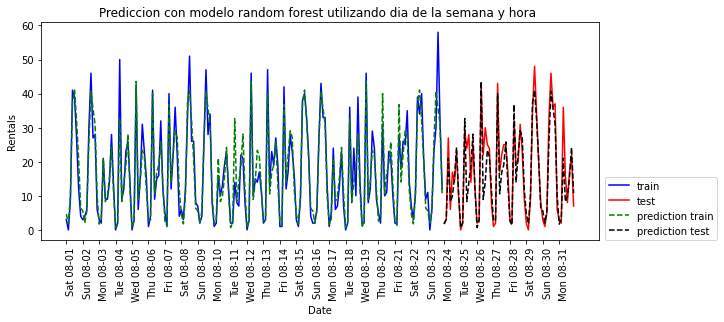

In [51]:
X_hour_week = np.hstack([citibikeone.index.dayofweek.values.reshape(-1,1),
                        citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)
plt.title('Prediccion con modelo random forest utilizando dia de la semana y hora ')

Ahora tenemos un modelo que captura el comportamiento periódico considerando el día de la semana y la hora del día. Tiene un R ^ 2 de 0,84 y muestra un rendimiento predictivo bastante bueno. Lo que probablemente este modelo está aprendiendo es el número medio de alquileres para cada combinación de día de la semana y hora del día desde los primeros 23 días de agosto. Intentemos con un modelo más simple, LinearRegression

Test-set R^2: 0.13


Text(0.5, 1.0, 'Prediccion con modelo linear regression utilizando dia de la semana y hora')

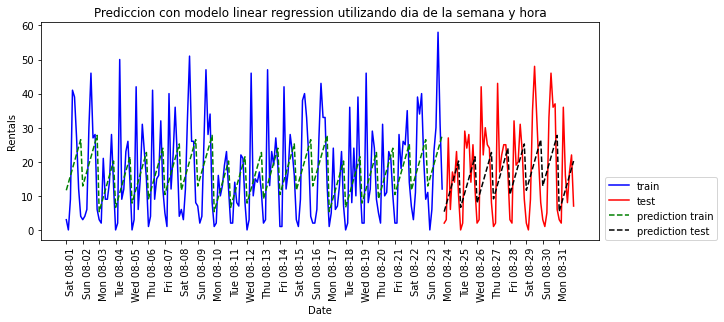

In [52]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())
plt.title('Prediccion con modelo linear regression utilizando dia de la semana y hora')

LinearRegression funciona mucho peor y el patrón periódico parece extraño. La razón de esto es que codificamos el día de la semana y la hora del día usando números enteros, que se interpretan como variables continuas. Por lo tanto, el modelo lineal solo puede aprender una función lineal de la hora del día, y aprendió que más tarde en el día, hay más alquileres. Sin embargo, los patrones son mucho más complejos que eso. Podemos capturar esto interpretando los enteros como variables categóricas, transformándolos usando OneHotEncoder

In [16]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

In [17]:
type(X_hour_week_onehot)

numpy.ndarray

Test-set R^2: 0.62


Text(0.5, 1.0, 'Prediccion utilizando linear regression con one-hot encoding usando dia de la semana y hora del dia como features')

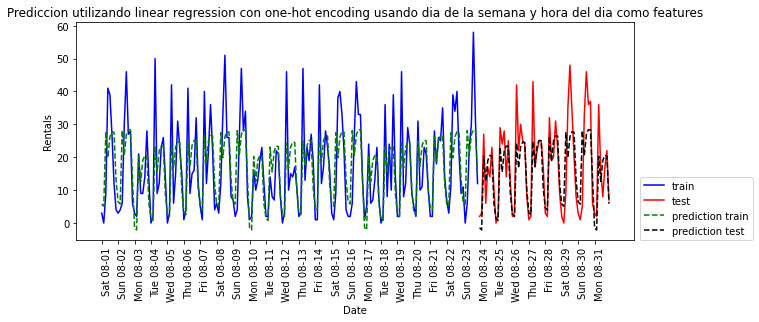

In [53]:
from sklearn.linear_model import Ridge
eval_on_features(X_hour_week_onehot, y, Ridge())
plt.title('Prediccion utilizando linear regression con one-hot encoding usando dia de la semana y hora del dia como features')


In [54]:
param_grid = {'gamma': [0, 0.5, 1, 1.5]}

In [55]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)

In [56]:
X_train, X_test = X_hour_week_onehot[:184], X_hour_week_onehot[184:]
    # also split the target array
y_train, y_test = X_hour_week_onehot[:184], X_hour_week_onehot[184:]

Esto nos da una coincidencia mucho mejor que la codificación de funciones continua. Ahora, el modelo lineal aprende un coeficiente para cada día de la semana y un coeficiente para cada momento del día. Sin embargo, eso significa que el patrón de "hora del día" se comparte entre todos los días de la semana.

Mediante el uso de funciones de interacción, podemos permitir que el modelo aprenda un coeficiente para cada combinación de día y hora del día.

Test-set R^2: 0.85


Text(0.5, 1.0, 'Predicciones usando modelo Linear Regression usando el producto del dia de la semana junto con las horas del dia')

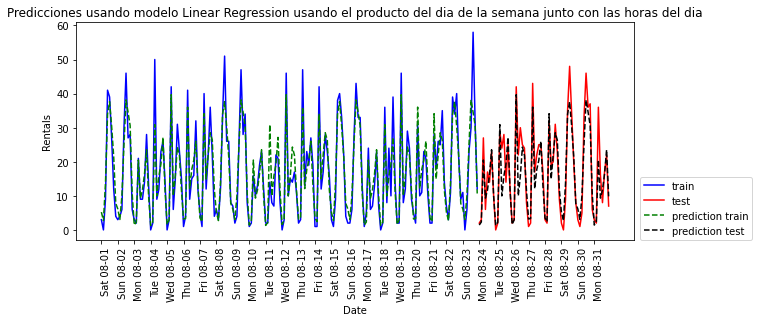

In [93]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                     include_bias=False)
X_hour_week_onehot_ply = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_ply, y, lr)
plt.title('Predicciones usando modelo Linear Regression usando el producto del dia de la semana junto con las horas del dia')


In [26]:
np.array(poly_transformer.get_feature_names()).reshape(1, -1)[:,:30]

array([['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
        'x10', 'x11', 'x12', 'x13', 'x14', 'x0 x1', 'x0 x2', 'x0 x3',
        'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10',
        'x0 x11', 'x0 x12', 'x0 x13', 'x0 x14', 'x1 x2']], dtype='<U7')

Esta transformación finalmente produce un modelo que funciona de manera similar al bosque aleatorio. Un gran beneficio de este modelo es que queda muy claro lo que se aprende; un coeficiente para cada día y hora. Simplemente podemos graficar los coeficientes aprendidos por el modelo, algo que no sería posible para el bosque aleatorio.

Primero, creamos nombres de funciones para las funciones de hora y día

In [27]:
hour = ['%02d:00' % i for i in range(0, 24, 3)]
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
features = day + hour

Luego nombramos todas las características de interacción extraídas por PolynomialFeatures, usando el método get_feature_names, y mantenemos solo las características con coeficientes distintos de cero:

In [28]:
features

['Mon',
 'Tue',
 'Wed',
 'Thu',
 'Fri',
 'Sat',
 'Sun',
 '00:00',
 '03:00',
 '06:00',
 '09:00',
 '12:00',
 '15:00',
 '18:00',
 '21:00']

In [29]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ !=0]
coef_nonzero = lr.coef_[lr.coef_ !=0]

In [30]:
features_zero = np.array(features_poly)[lr.coef_ ==0]

In [31]:
features_poly[:10]

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', '00:00', '03:00', '06:00']

Text(0, 0.5, 'Feature magnitude')

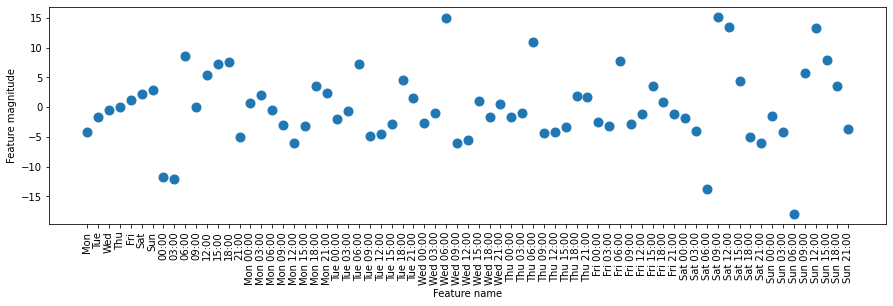

In [32]:
# Podemos visualizar los coeficientes obtenidos por el modelo lineal
plt.figure(figsize=(15, 4))
plt.plot(coef_nonzero, 'o', markersize=9)
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90, ha='center')
plt.xlabel('Feature name')
plt.ylabel('Feature magnitude')

Finalmente, podemos observar la importancia de cada uno de los features para la prediccion en los distintos dias de la semana y las horas.